In [1]:
import pandas as pd
from pathlib import Path

In [2]:
input_dirs = [
    "length_sampling/100M_samples_eos_zipf_min1_max20",
    "length_sampling/100M_samples_eos_zipf_min1_max20_DeterministicShuffle",
    "length_sampling/100M_samples_eos_zipf_min1_max20_EvenOddShuffle",
    "length_sampling/100M_samples_eos_zipf_min1_max20_NonDeterministicShuffle",
    "length_sampling/100M_samples_eos_zipf_min1_max20_LocalShuffle",
    "length_sampling/100M_samples_eos_zipf_min1_max20_NoReverse",
    "length_sampling/100M_samples_eos_zipf_min1_max20_PartialReverse",
    "length_sampling/100M_samples_eos_zipf_min1_max20_FullReverse",
]
input_dirs = [Path("../results").resolve() / item for item in input_dirs]

In [3]:
# entropy_name = "entropy_balanced_samples100.value"
entropy_name = "entropy_all_samples.value"

lang2entropy = {}
for input_dir in input_dirs:
    entropy_file = input_dir / entropy_name
    if len(input_dir.name.split("_")) == 6:
        lang = "Base"
    else:
        lang = input_dir.name.split("_")[6]
    entropy = float(entropy_file.read_text().strip())
    lang2entropy[lang] = entropy

lang2entropy

{'Base': 17.553367547990938,
 'DeterministicShuffle': 17.553367547990938,
 'EvenOddShuffle': 17.553367547990938,
 'NonDeterministicShuffle': 17.98847827497766,
 'LocalShuffle': 17.553367547990938,
 'NoReverse': 17.823073765123045,
 'PartialReverse': 17.823047952657088,
 'FullReverse': 17.82307307242368}

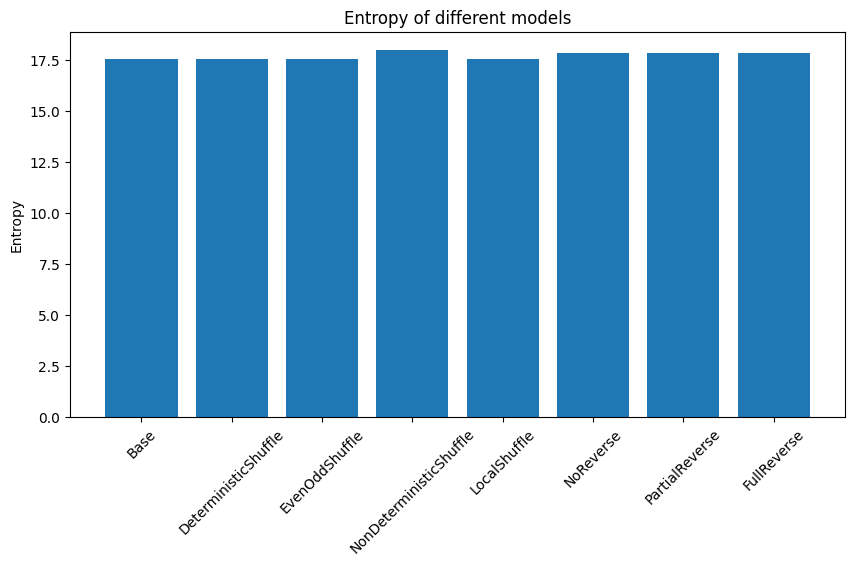

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(lang2entropy.keys(), lang2entropy.values())
plt.ylabel("Entropy")
plt.title("Entropy of different models")
plt.xticks(rotation=45)
plt.show()

In [5]:
perplexity_name = "perplexity_balanced_samples100.value"
perplexity_name = "perplexity_all_samples.value"

lang2perplexity = {}
for input_dir in input_dirs:
    perplexity_file = input_dir / perplexity_name
    if len(input_dir.name.split("_")) == 6:
        lang = "Base"
    else:
        lang = input_dir.name.split("_")[6]
    perplexity = float(perplexity_file.read_text().strip())
    lang2perplexity[lang] = perplexity

In [7]:
lang2perplexity

{'Base': 192349.099235122,
 'DeterministicShuffle': 192349.099235122,
 'EvenOddShuffle': 192349.099235122,
 'NonDeterministicShuffle': 260058.789751005,
 'LocalShuffle': 192349.099235122,
 'NoReverse': 231888.82407220828,
 'PartialReverse': 231884.67519204936,
 'FullReverse': 231888.71273252915}

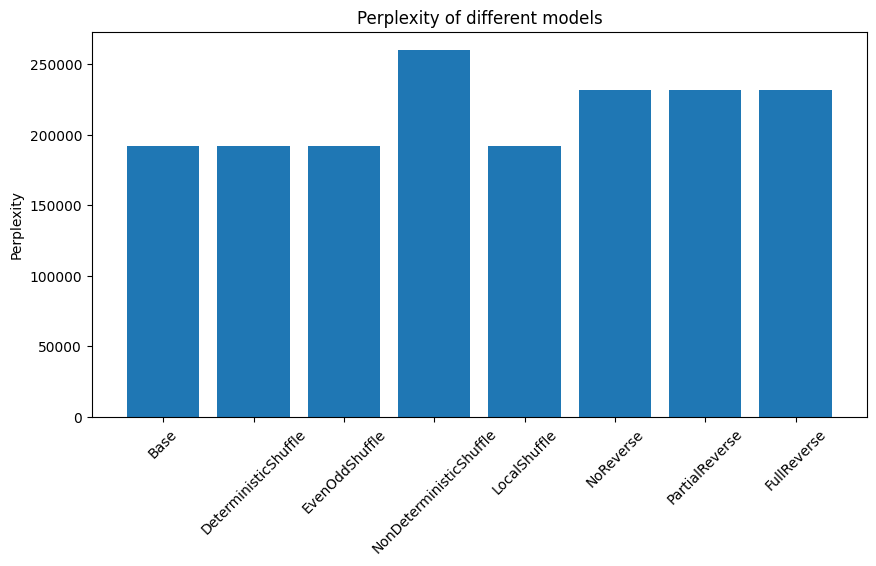

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(lang2perplexity.keys(), lang2perplexity.values())
plt.ylabel("Perplexity")
plt.title("Perplexity of different models")
plt.xticks(rotation=45)
plt.show()

In [6]:
input_dirs = [
    "length_sampling/100M_samples_eos_zipf_min1_max20",
    "length_sampling/100M_samples_eos_zipf_min1_max20_DeterministicShuffle",
    "length_sampling/100M_samples_eos_zipf_min1_max20_EvenOddShuffle",
    "length_sampling/100M_samples_eos_zipf_min1_max20_NonDeterministicShuffle",
    "length_sampling/100M_samples_eos_zipf_min1_max20_LocalShuffle",
    "length_sampling/100M_samples_eos_zipf_min1_max20_NoReverse",
    "length_sampling/100M_samples_eos_zipf_min1_max20_PartialReverse",
    "length_sampling/100M_samples_eos_zipf_min1_max20_FullReverse",
]
input_dirs = [Path("../results").resolve() / item for item in input_dirs]



{'Base': 1456674314,
 'DeterministicShuffle': 1772880726,
 'EvenOddShuffle': 1613852222,
 'NonDeterministicShuffle': 1796910153,
 'LocalShuffle': 1721871287,
 'NoReverse': 1604438961,
 'PartialReverse': 1668573592,
 'FullReverse': 1611781747}

In [12]:
import gzip
import tempfile
import os
from tqdm import tqdm

lang2compressivity = {}
for input_dir in tqdm(input_dirs):
    gzip_file = input_dir / "samples.txt.gz"
    
    if len(input_dir.name.split("_")) == 6:
        lang = "Base"
    else:
        lang = input_dir.name.split("_")[6]
    
    # 一時ファイルを作成して展開
    with tempfile.NamedTemporaryFile(delete=False) as temp_file:
        with gzip.open(gzip_file, 'rb') as gz:
            temp_file.write(gz.read())
    
    try:
        # サイズを取得
        compressed_size = gzip_file.stat().st_size
        original_size = os.path.getsize(temp_file.name)
        compressivity = compressed_size / original_size
        lang2compressivity[lang] = compressivity
    finally:
        # 一時ファイルを削除
        os.unlink(temp_file.name)

# 通常の表示
print("All results:")
for lang, ratio in lang2compressivity.items():
    print(f"{lang}: {ratio:.5f}")

# 圧縮率順でソートして表示
print("\nSorted by compressivity (ascending):")
for lang, ratio in sorted(lang2compressivity.items(), key=lambda x: x[1]):
    print(f"{lang}: {ratio:.5f}")


100%|██████████| 8/8 [02:41<00:00, 20.22s/it]

All results:
Base: 0.18998
DeterministicShuffle: 0.23122
EvenOddShuffle: 0.21048
NonDeterministicShuffle: 0.23435
LocalShuffle: 0.22457
NoReverse: 0.18948
PartialReverse: 0.19706
FullReverse: 0.19035

Sorted by compressivity (ascending):
NoReverse: 0.18948
Base: 0.18998
FullReverse: 0.19035
PartialReverse: 0.19706
EvenOddShuffle: 0.21048
LocalShuffle: 0.22457
DeterministicShuffle: 0.23122
NonDeterministicShuffle: 0.23435


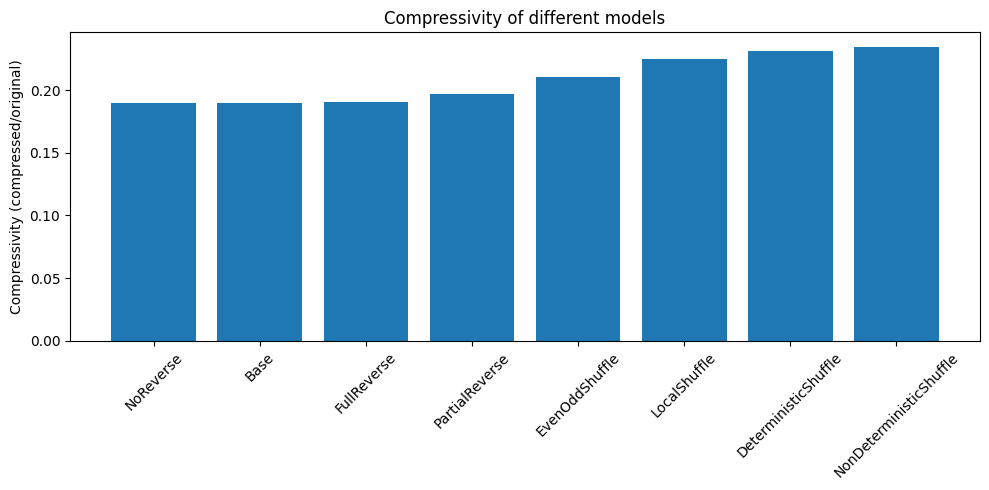

In [13]:
# プロット
plt.figure(figsize=(10, 5))
sorted_items = sorted(lang2compressivity.items(), key=lambda x: x[1])
plt.bar([x[0] for x in sorted_items], [x[1] for x in sorted_items])
plt.ylabel("Compressivity (compressed/original)")
plt.title("Compressivity of different models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

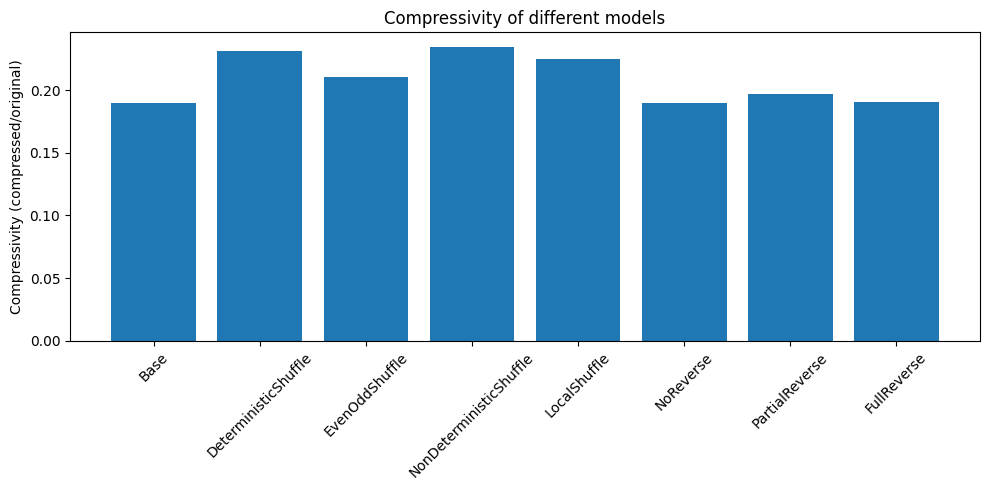

In [14]:
# プロット
plt.figure(figsize=(10, 5))
sorted_items = lang2compressivity.items()
plt.bar([x[0] for x in sorted_items], [x[1] for x in sorted_items])
plt.ylabel("Compressivity (compressed/original)")
plt.title("Compressivity of different models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()